In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
# Hesaplar veri çerçevesi
accounts = pd.DataFrame({'user_id': range(1, 11), 'username': ['user_' + str(i) for i in range(1, 11)]})

# Takipçiler veri çerçevesi
followers = pd.DataFrame({'follower_id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                           'following_id': [2, 3, 4, 5, 6, 7, 8, 9, 1]})

In [5]:
G = nx.DiGraph()

In [6]:
# Düğümleri ekleme
for index, row in accounts.iterrows():
    G.add_node(row['user_id'], username=row['username'])

In [9]:
G.degree

DiDegreeView({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0})

In [10]:
# Kenarları ekleme
for index, row in followers.iterrows():
    G.add_edge(row['follower_id'], row['following_id'])

# Derece hesaplama
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Betweenness centrality hesaplama
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness centrality hesaplama
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector centrality hesaplama
eigenvector_centrality = nx.eigenvector_centrality(G)

In [11]:
# Özellikleri hesaplar veri çerçevesine ekleme
accounts['in_degree'] = accounts['user_id'].map(in_degrees)
accounts['out_degree'] = accounts['user_id'].map(out_degrees)
accounts['betweenness_centrality'] = accounts['user_id'].map(betweenness_centrality)
accounts['closeness_centrality'] = accounts['user_id'].map(closeness_centrality)
accounts['eigenvector_centrality'] = accounts['user_id'].map(eigenvector_centrality)

print(accounts)

   user_id username  in_degree  out_degree  betweenness_centrality  \
0        1   user_1          1           1                0.388889   
1        2   user_2          1           1                0.388889   
2        3   user_3          1           1                0.388889   
3        4   user_4          1           1                0.388889   
4        5   user_5          1           1                0.388889   
5        6   user_6          1           1                0.388889   
6        7   user_7          1           1                0.388889   
7        8   user_8          1           1                0.388889   
8        9   user_9          1           1                0.388889   
9       10  user_10          0           0                0.000000   

   closeness_centrality  eigenvector_centrality  
0              0.197531                0.333333  
1              0.197531                0.333333  
2              0.197531                0.333333  
3              0.197531      

In [12]:
influential_node = max(G.nodes, key=lambda node: nx.eigenvector_centrality(G)[node])
print("En etkili kullanıcı:", influential_node)

En etkili kullanıcı: 1


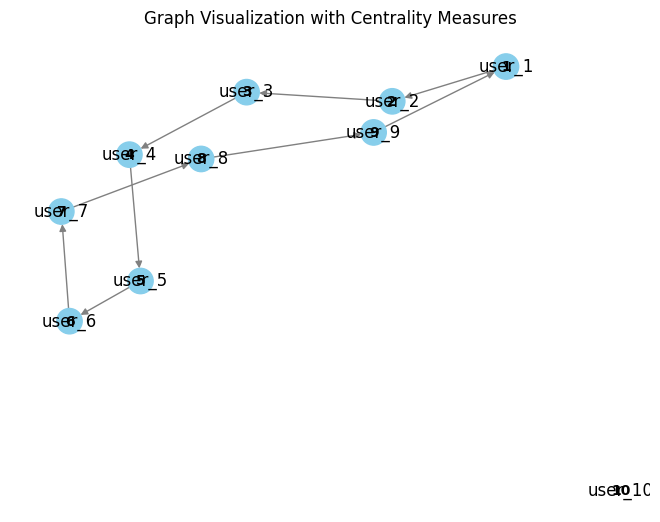

In [13]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
accounts = pd.DataFrame({'user_id': range(1, 11), 'username': ['user_' + str(i) for i in range(1, 11)]})
for index, row in accounts.iterrows():
    G.add_node(row['user_id'], username=row['username'])

# Add edges
followers = pd.DataFrame({'follower_id': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'following_id': [2, 3, 4, 5, 6, 7, 8, 9, 1]})
for index, row in followers.iterrows():
    G.add_edge(row['follower_id'], row['following_id'])

# Calculate centrality measures
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Add centrality measures to nodes
nx.set_node_attributes(G, in_degrees, 'in_degree')
nx.set_node_attributes(G, out_degrees, 'out_degree')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')

# Draw the graph
pos = nx.spring_layout(G)
node_size = [v * 1000 for v in eigenvector_centrality.values()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# Draw node labels
node_labels = nx.get_node_attributes(G, 'username')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title('Graph Visualization with Centrality Measures')
plt.show()